In [5]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

# MLE and errors

In [28]:
import numpy as np
from scipy import integrate, stats, interpolate
from toolbox import vis, fits
from toolbox import as_toolbox as ast
import urllib
import matplotlib.pyplot as plt
import importlib as il
from iminuit import Minuit
import toolbox
from scipy import optimize
from toolbox.ExternalFunctions import UnbinnedLH
import importlib

# Ex. 3 from previous lecture 

In [36]:
f = urllib.request.urlopen(
    'https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2021/data/MLE_Variance_data.txt')
data = np.loadtxt(f)
data0 = data[:,0]
data1 = data[:,1]

In [58]:
xmin, xmax = -1, 1
def func_pdf(x, alpha, beta, N): 
    return N*(1 + alpha*x + beta*x**2)/(xmax + 1/2*alpha*xmax**2 
                                      + 1/3*beta*xmax**3 
                                      - xmin - 1/2*alpha*xmin**2 
                                      - 1/3*beta*xmin**3)

## unbinned log likelihood

In [59]:
#perform the fit using unbinned log likelihood
ullh_f = UnbinnedLH(func_pdf, data[:,0])
f_minuit = Minuit(ullh_f,  pedantic=False, print_level=1)
f_minuit.migrad();       # This is where the minimisation is carried out!
alpha_fit, beta_fit = f_minuit.args[:2]
sig_alpha, sig_beta = f_minuit.errors['alpha'], f_minuit.errors['beta'] 

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1.074e+04                 │        Nfcn = 552 (552 total)        │
│ EDM = 627 (Goal: 0.0001)         │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│INVALID Minimum│ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


In [60]:
minuit_obj, x, y, sy = fits.hist_fit(func_pdf, data0, (0,0), 40)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 61.23                      │         Nfcn = 86 (86 total)         │
│ EDM = 4.68e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


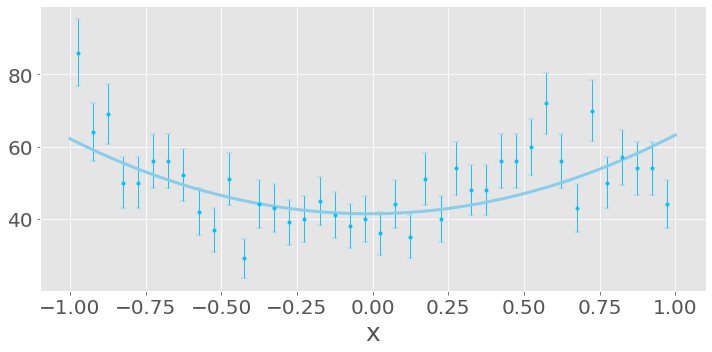

In [61]:
alpha_fit, beta_fit, N_fit = minuit_obj.values['alpha'], minuit_obj.values['beta'], minuit_obj.values['N']
x_axis = np.linspace(-1,1,200)
ax, fig = vis.nice_plot(x,y, SY = sy, errorbar=True, show_plot=False)
ax, fig = vis.nice_plot(x_axis , func_pdf(x_axis, alpha_fit, beta_fit, N_fit),figure = fig, axis =ax)
fig

In [63]:
chi2 = minuit_obj.fval
stats.chi2.sf(chi2, df = len(x)-2 )

0.009854430289434403

# Ex 1 Compue LLH ratio 

In [74]:
def pdf0(x, alpha, beta, N): 
    return N*(1 + alpha*x + beta*x**2)/(xmax + 1/2*alpha*xmax**2 
                                      + 1/3*beta*xmax**3 
                                      - xmin - 1/2*alpha*xmin**2 
                                      - 1/3*beta*xmin**3)
def pdfA(x, alpha, beta,gamma, N):
    return N*(1 + alpha*x + beta*x**2 - gamma*x**5)/(xmax + 1/2*alpha*xmax**2 
                                      + 1/3*beta*xmax**3 - 1/6*gamma*xmax**6
                                      - xmin - 1/2*alpha*xmin**2 
                                      - 1/3*beta*xmin**3 + 1/6*gamma*xmax**6)

In [64]:
f = urllib.request.urlopen(
    'https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2021/data/LLH_Ratio_2_data.txt')
data = np.loadtxt(f)
data0 = data[:,0]
data1 = data[:,1]

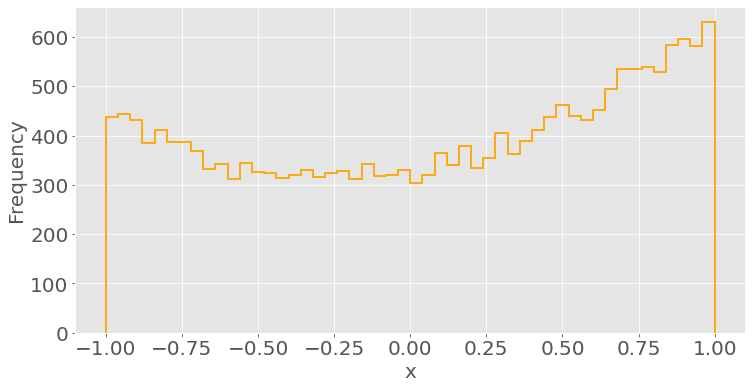

In [73]:

x, y, binwidth, fig, ax = vis.nice_histogram(data0, 50, show_plot=False)
#x, y, binwidth, fig, ax = vis.nice_histogram(data1, 50, show_plot=False,axis = ax, figure=fig)
fig

In [77]:
ast.UNLLH

In [92]:
ullh_0 = ast.UNLLH(pdf0, data0)
f_minuit = Minuit(ullh_0,  pedantic=False, N = len(data0), print_level=1, fix_N = True)
f_minuit.migrad();       # This is where the minimisation is carried out!
alpha_fit, beta_fit, N_fit = f_minuit.args
sig_alpha, sig_beta = f_minuit.errors['alpha'], f_minuit.errors['beta'] 
UL0 = -ullh_0(alpha_fit, beta_fit, N_fit)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1.846e+05                 │         Nfcn = 51 (51 total)         │
│ EDM = 5.72e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


In [94]:
ullh_A = ast.UNLLH(pdfA, data0)
f_minuit = Minuit(ullh_A,  pedantic=False, N = len(data0), print_level=1, fix_N = True)
f_minuit.migrad();       # This is where the minimisation is carried out!
alpha_fit, beta_fit, gamma_fit, N_fit = f_minuit.args
sig_alpha, sig_beta = f_minuit.errors['alpha'], f_minuit.errors['beta'] 
ULalt = -ullh_A(alpha_fit, beta_fit, gamma_fit, N_fit)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1.846e+05                 │         Nfcn = 95 (95 total)         │
│ EDM = 4.39e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


In [102]:
DLLH = -2*(UL0-ULalt)
p_value = stats.chi2.sf(DLLH, 1)
p_value#right

0.22561698111206713